# Comparison of Model to Assay + Application

In this notebook, I am going to first plot how the output of our model
compares to the experimental data. I then go onto apply our model to 
probe the regulatory potential of all regions upstream of TSSs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
from dragonn import models
model = models.SequenceDNN_Regression.load("models/models/145_weighted.arch.json", "models/models/145_weighted.weights.h5")

In [3]:
from mrpa_data import MrpaData
data = MrpaData()

mrpa_data.py:115: UserWarning: Replacing 'N' bases in seq with 'A' in seq NNNNNNNNNGATCCCGCGGCCGTGTTTTCCTGGTGGCCCGGCCGTGCCTGAGGTTTCTCCCCGAGCCGCCGCCTCTGCGGGCTCCCGGGTGCCCTTGCCCTCACGGTCCCCGGCCCTCGCCCGTCTGTGCCCTCTTCCCCGCCCG.
  warn("Replacing 'N' bases in seq with 'A' in seq {}.".format(seq))
mrpa_data.py:115: UserWarning: Replacing 'N' bases in seq with 'A' in seq NNNNGATCCCGCGGCCGTGTTTTCCTGGTGGCCCGGCCGTGCCTGAGGTTTCTCCCCGAGCCGCCGCCTCTGCGGGCTCCCGGGTGCCCTTGCCCTCACGGTCCCCGGCCCTCGCCCGTCTGTGCCCTCTTCCCCGCCCGCCGCC.
  warn("Replacing 'N' bases in seq with 'A' in seq {}.".format(seq))
mrpa_data.py:115: UserWarning: Replacing 'N' bases in seq with 'A' in seq NNNNNNNNNNNNNNNNNNGAATTCAATGGAGTGGACTGGAGTGCTGTGGGGTGGAGTGGAATGGAGTGTAGTTGAATGGAGTGGAATGGAATGCGATGGAATGGAGTGGAGTTGAGCAGAGTGAAGTGGAAAGGTGTAGAATGGA.
  warn("Replacing 'N' bases in seq with 'A' in seq {}.".format(seq))
mrpa_data.py:115: UserWarning: Replacing 'N' bases in seq with 'A' in seq NNNNNNNNNNNNNGAATTCAATGGAGTGGACTGGAGTGCTGTGGGGTGGAGTGGAA

In [22]:
def quantile_plot(x, y, quantiles = 5000):
    data_pairs = sorted([(i, j) for i, j in zip(x, y)], key = lambda x: x[0])
    avg_activity, avg_score = [], []
    for i in range(0, len(data_pairs), len(data_pairs) / quantiles):
        index = range(i, min(i + (len(data_pairs) / quantiles), len(data_pairs)))
        activities = [data_pairs[j][0] for j in index]
        scores  = [data_pairs[j][1] for j in index]
        avg_activity.append(sum(activities) / float(len(activities)))
        avg_score.append(sum(scores) / float(len(scores)))
    plt.scatter(avg_activity, avg_score)
    plt.show()

# Run Model on experimentally tested sequences

In [27]:
predictions = model.predict(data.X_one_hot())

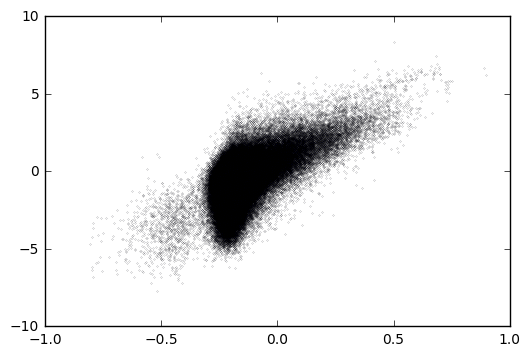

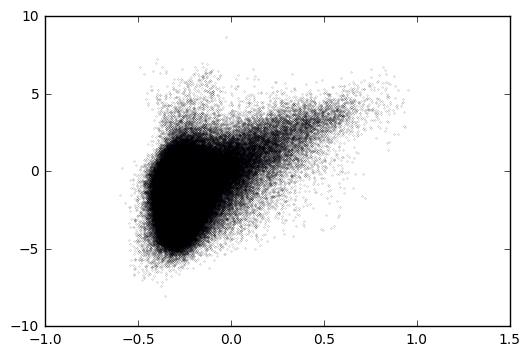

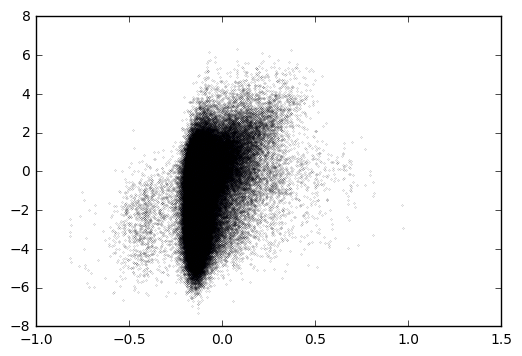

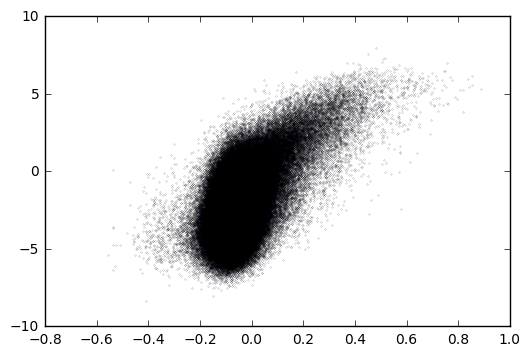

In [28]:
for i in range(4):
    plt.scatter(predictions[:, i], data.y_multitask()[: , i], s = .01)
    plt.show()

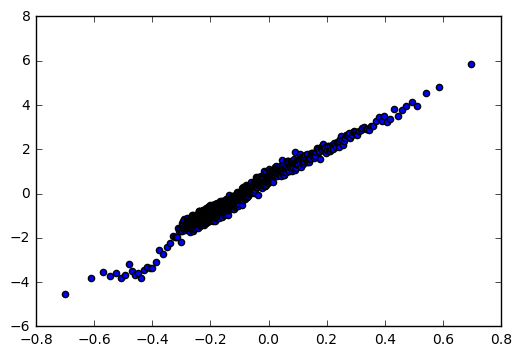

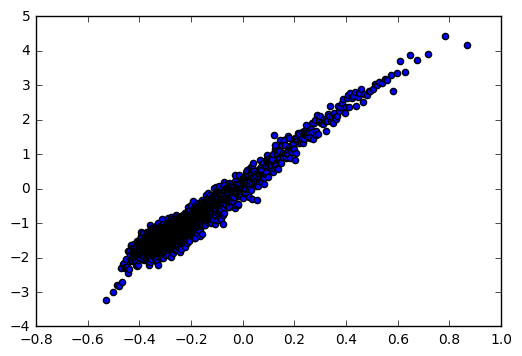

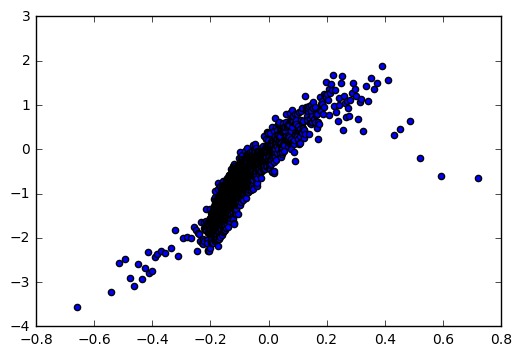

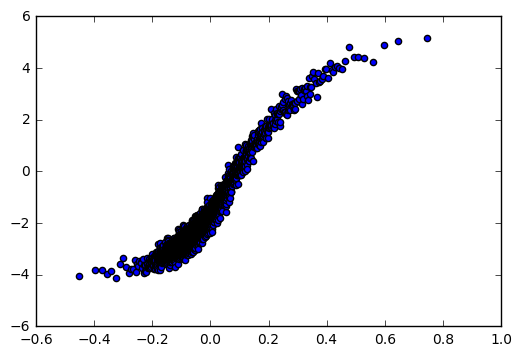

In [29]:
for i in range(4):
    quantile_plot(predictions[:, i], data.y_multitask()[: , i])

# Run Model on all promoter regions

In [ ]:
# Read in promoter region sequences

# one hot encode